# Autotrader_5_adaboost_gradientboost_histgbr_lightgbm
---

In [1]:
# import packages (pd, viz)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load

# import myfunctions.py (functions used in multiple notebooks)
import myfunctions

# import packages (preprocessing)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# import packages (models)
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

from lightgbm import LGBMRegressor

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Read in file

In [2]:
# Read in file
filepath = '../data/df_master_2.csv'
df = pd.read_csv(filepath, index_col=0)
print(df.shape)

# Set features and target
X = df.copy()
y = X.pop('price')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(14996, 13)


((11996, 12), (3000, 12), (11996,), (3000,))

# Define Functions
1. pipe_construct: construct a pipeline according to input features and choice of model
2. plot_coef_pipe: function to plot resulting coefficients from fitted pipe

In [3]:
# Define input features 
features_cont = ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
features_cat = ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']

def pipe_construct(features_cont=features_cont, features_cat=features_cat, model=AdaBoostRegressor()):
    '''
    Input: continuous features, categorical features, model of choice. 
    Returns: pipeline.
    '''
    t = [('cont', StandardScaler(), features_cont), 
         ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), features_cat)]

    transformer = ColumnTransformer(transformers=t, remainder='drop')

    pipe = Pipeline(steps=[('transformer', transformer), ('model', model)])
    return pipe


def plot_coef_pipe(pipe, X_train, X_test, y_train, y_test):
    '''plot coefficients from a model'''
    # df for model coefficients    
#     col_names = features_cont + list(transformer.named_transformers_.cat.get_feature_names())
    col_names = features_cont + list(pipe.named_steps.transformer.named_transformers_.cat.get_feature_names())
    
    df_model_coef = pd.DataFrame(pipe.named_steps.model.coef_, index=col_names, columns=['coef'])
    df_model_coef['coef_abs'] = np.abs(df_model_coef)
    
    # plot coefficients in order of importance
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    plt.tight_layout(w_pad=10)

    df_model_coef.coef.sort_values()[:10].plot(kind='barh', ax=ax[0])
    df_model_coef.coef.sort_values()[-10:].plot(kind='barh', ax=ax[1])

    ax[0].set_title('Feature Importance (negative impact)')
    ax[1].set_title('Feature Importance (positive impact)')

    print('Coefficients:')
    plt.show()
    

def plot_feat_imp(pipe, X_train, X_test, y_train, y_test, n_features=10):
    '''
    Plot feature importances from model.
    Input: pipe, X_train, X_test, y_train, y_test, n_features (number of features to show).
    Returns: plot of feature importances.
    '''
    # dataframe for feature importances
    col_names = features_cont + list(pipe.named_steps.transformer.named_transformers_.cat.get_feature_names())
    df_feat_imp = pd.DataFrame(pipe.named_steps.model.feature_importances_, index=col_names, columns=['feat_imp'])

    # plot of feature importances
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    df_feat_imp.sort_values(by='feat_imp')[-n_features:].plot(kind='barh', ax=ax)
    ax.set_title('Feature Importances')
    plt.show()

# 1. AdaBoostRegressor

In [4]:
# AdaBoostRegressor(); all features
features_cont = ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
features_cat = ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']
print('cont features: ', features_cont)
print('cat features:  ', features_cat)
print()

# fit pipe
pipe = pipe_construct(features_cont, features_cat, AdaBoostRegressor(random_state=1))
pipe.fit(X_train, y_train)
print(pipe.named_steps.model)
print()

# print scores
myfunctions.print_scores(pipe, X_train, X_test, y_train, y_test)
print()

# # plots
# myfunctions.plot_predictions(pipe, X_train, X_test, y_train, y_test)
# myfunctions.plot_residuals(pipe, X_train, X_test, y_train, y_test)
# plot_feat_imp(pipe, X_train, X_test, y_train, y_test)

cont features:  ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
cat features:   ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']

AdaBoostRegressor(random_state=1)

R2 Train, Test:		0.8039022942318788 	 0.7550147573794234
R2 Train (CV Mean):	0.6999180301329028

RMSE Train, Test:	13192.606589000252 	 14264.099653604044
MAE  Train, Test:	10279.788910684778 	 10456.761364704551



# 2. GradientBoostingRegressor

In [5]:
# GradientBoostingRegressor(); all features
features_cont = ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
features_cat = ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']
print('cont features: ', features_cont)
print('cat features:  ', features_cat)
print()

# fit pipe
pipe = pipe_construct(features_cont, features_cat, GradientBoostingRegressor(random_state=1))
pipe.fit(X_train, y_train)
print(pipe.named_steps.model)
print()

# print scores
myfunctions.print_scores(pipe, X_train, X_test, y_train, y_test)
print()

# # plots
# myfunctions.plot_predictions(pipe, X_train, X_test, y_train, y_test)
# myfunctions.plot_residuals(pipe, X_train, X_test, y_train, y_test)
# plot_feat_imp(pipe, X_train, X_test, y_train, y_test)

cont features:  ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
cat features:   ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']

GradientBoostingRegressor(random_state=1)

R2 Train, Test:		0.9607198059308133 	 0.924806883700284
R2 Train (CV Mean):	0.9246520227666208

RMSE Train, Test:	5904.473364089797 	 7902.480707137287
MAE  Train, Test:	2617.182631706663 	 3004.8121135285423



# 3. GridSearch GradientBoostingRegressor

In [8]:
param_grid = {
    'learning_rate':[0.1, 0.2, 0.6, 0.8],
    'n_estimators':[100, 500],
    'random_state':[None],
    }

In [9]:
# GradientBoostingRegressor(); all features
features_cont = ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
features_cat = ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']
print('cont features: ', features_cont)
print('cat features:  ', features_cat)
print()

# fit pipe
pipe = pipe_construct(features_cont, features_cat, 
                      GridSearchCV(estimator=GradientBoostingRegressor(random_state=1), 
                                   param_grid=param_grid, cv=5, n_jobs=-1, verbose=1))
pipe.fit(X_train, y_train)
print(pipe.named_steps.model)
print()

# print scores
myfunctions.print_scores(pipe, X_train, X_test, y_train, y_test)
print()

cont features:  ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
cat features:   ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.7min finished


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.6, 0.8],
                         'n_estimators': [100, 500], 'random_state': [None]},
             verbose=1)

Train score:  0.9909333594341401
Test score:   0.9489020182976421
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  8.6min finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  8.0min finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.6min finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.8min finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  8.4min finished


CV mean:      0.9446372862526735



In [14]:
print('Grid Parameters:\n')
print(pipe.named_steps.model.get_params)
print('\n')
print('Best Parameters:\n')
print(pipe.named_steps.model.best_params_)

Grid Parameters:

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.6, 0.8],
                         'n_estimators': [100, 500], 'random_state': [None]},
             verbose=1)>


Best Parameters:

{'learning_rate': 0.2, 'n_estimators': 500, 'random_state': None}


In [18]:
grid = pipe.named_steps.model

dump(pipe, filename='autotrader_gbr_pipe.joblib')
dump(grid, filename='autotrader_gbr_grid.joblib')

['autotrader_gbr_grid.joblib']

# 4. HistGradientBoostingRegressor

In [9]:
# HistGradientBoostingRegressor(); all features
features_cont = ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
features_cat = ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']
print('cont features: ', features_cont)
print('cat features:  ', features_cat)
print()

# fit pipe
pipe = pipe_construct(features_cont, features_cat, HistGradientBoostingRegressor(random_state=1))
pipe.fit(X_train, y_train)
print(pipe.named_steps.model)
print()

# print scores
myfunctions.print_scores(pipe, X_train, X_test, y_train, y_test)
print()

cont features:  ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
cat features:   ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']

HistGradientBoostingRegressor(random_state=1)

R2 Train, Test:		0.9675406756006562 	 0.938936159391911
R2 Train (CV Mean):	0.9369722405460141

RMSE Train, Test:	5367.401627296525 	 7121.417707096962
MAE  Train, Test:	1830.5335360940107 	 2254.3420933528755



# 5. LightGBM Regressor

cont features:  ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
cat features:   ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']

LGBMRegressor(random_state=1)

R2 Train, Test:		0.975432178124052 	 0.9350818780583636
R2 Train (CV Mean):	0.9400186612500236

RMSE Train, Test:	4669.578521693472 	 7342.726903362951
MAE  Train, Test:	1796.7208507019934 	 2300.0750927811105

Predictions:


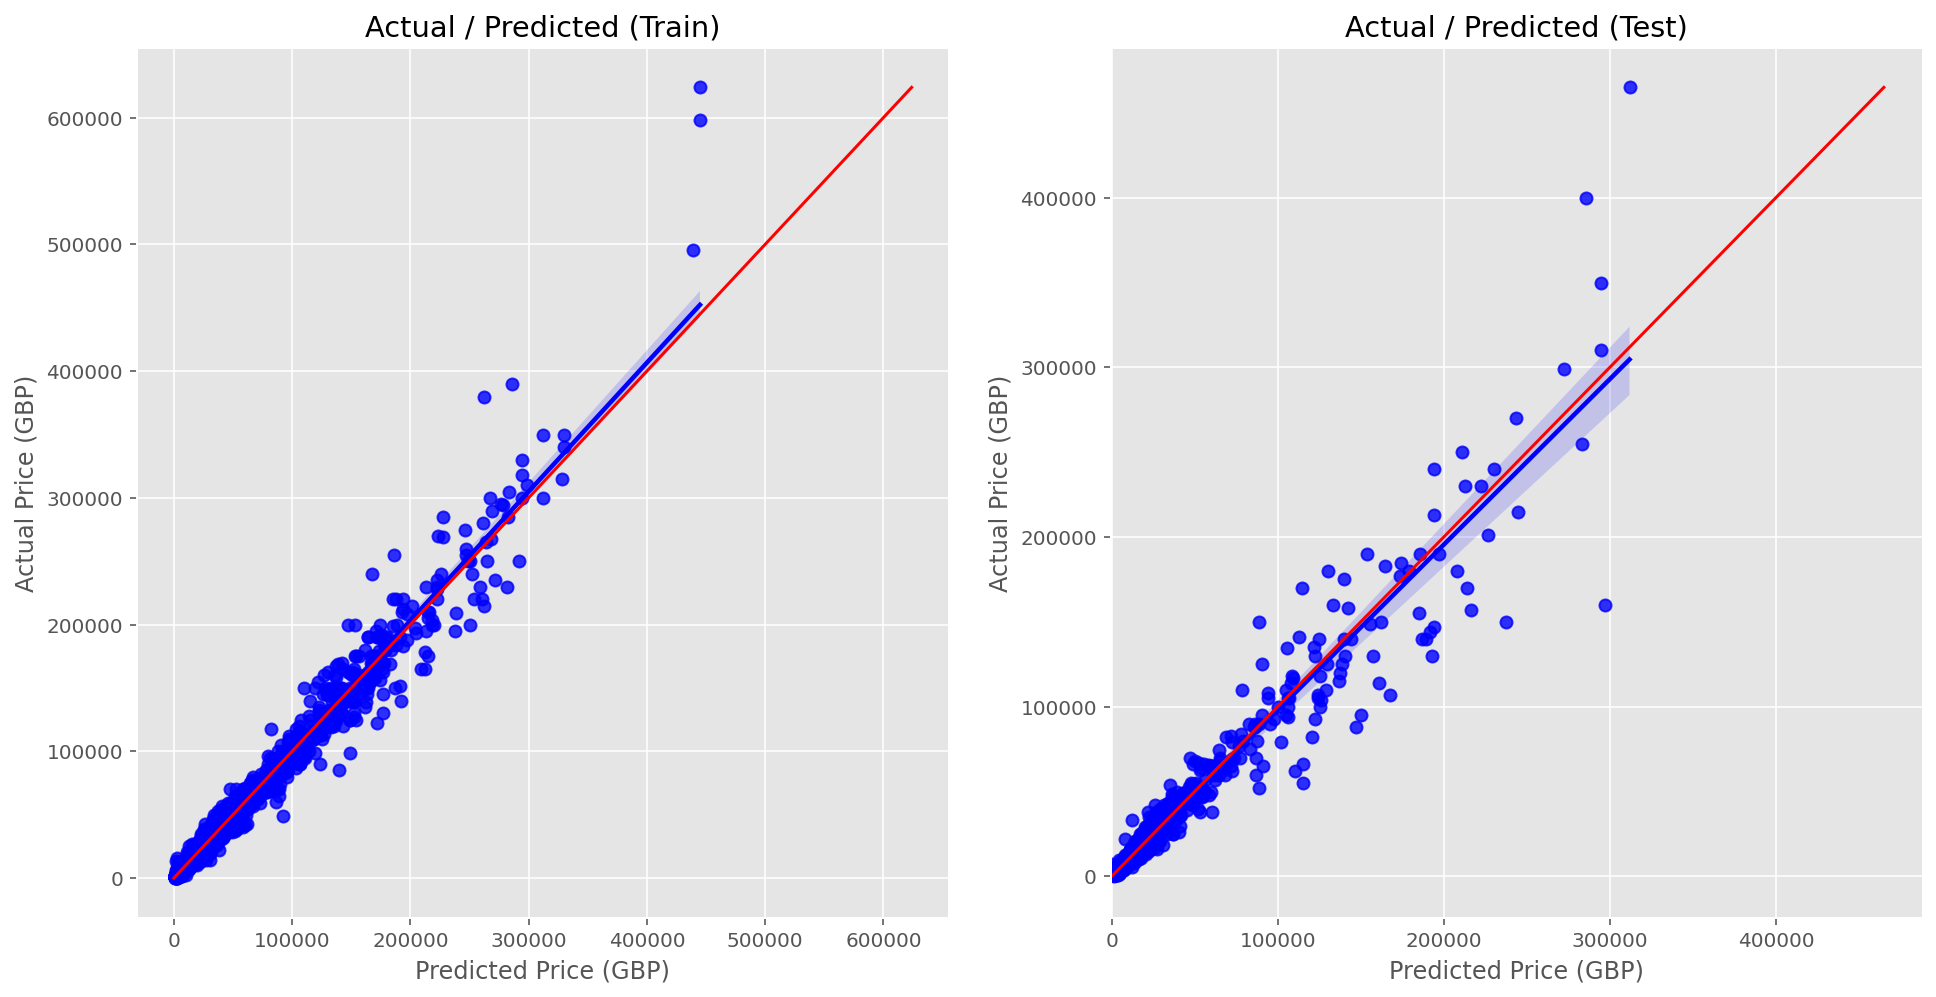

Distribution of residuals:


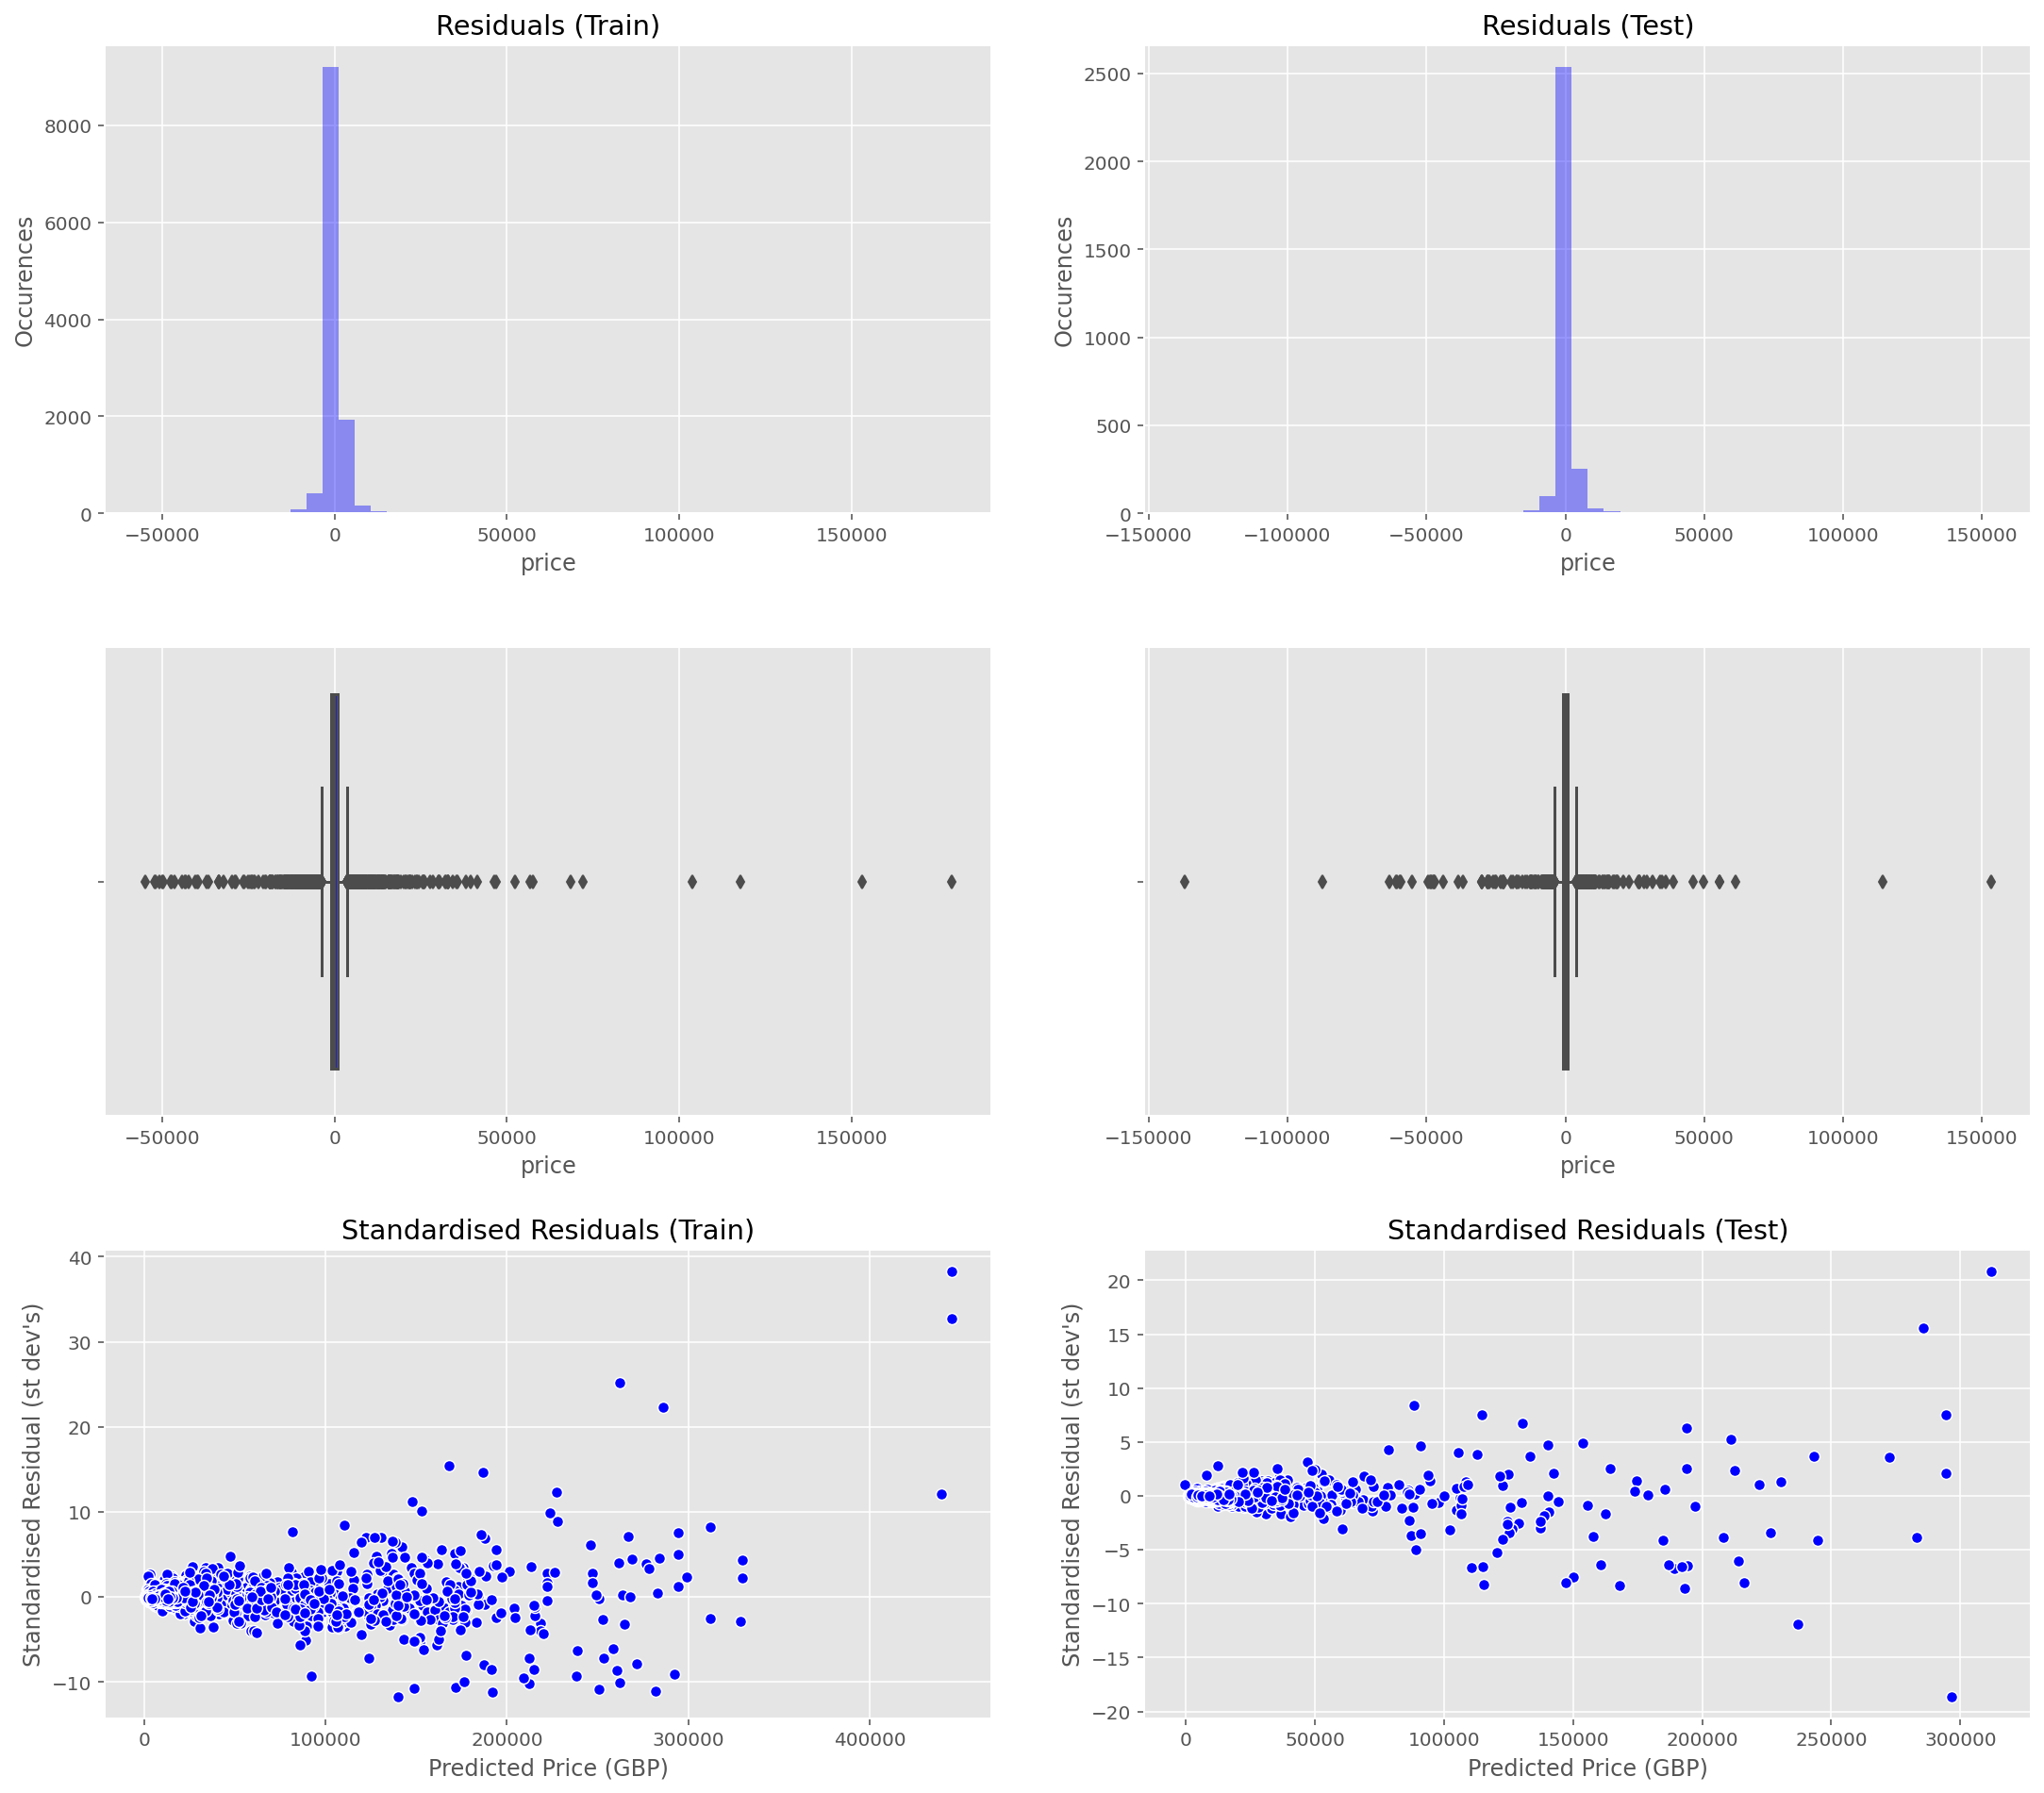

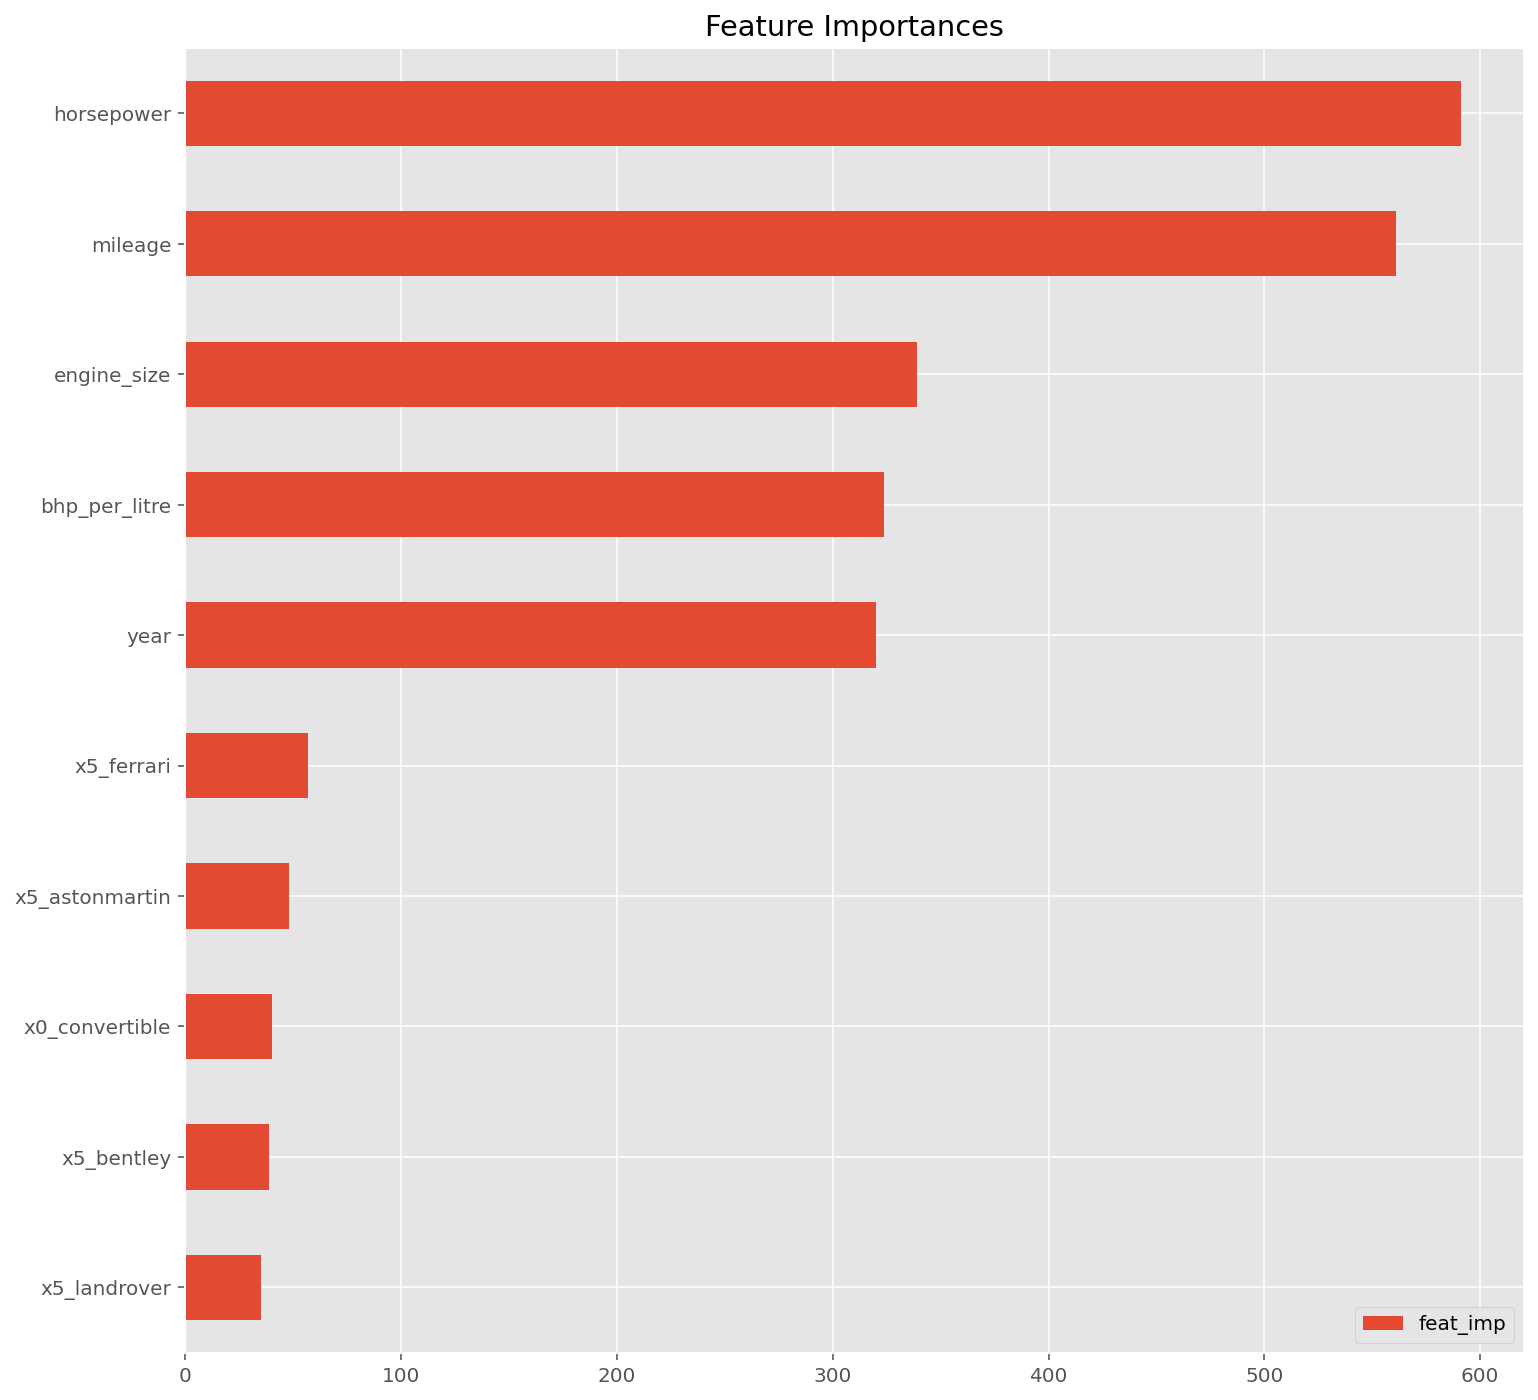

In [4]:
# LightGBMRegressor(); all features
features_cont = ['year', 'mileage', 'engine_size', 'horsepower', 'bhp_per_litre']
features_cat = ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']
print('cont features: ', features_cont)
print('cat features:  ', features_cat)
print()

# fit pipe
pipe = pipe_construct(features_cont, features_cat, LGBMRegressor(random_state=1))
pipe.fit(X_train, y_train)
print(pipe.named_steps.model)
print()

# print scores
myfunctions.print_scores(pipe, X_train, X_test, y_train, y_test)
print()

# plots
myfunctions.plot_predictions(pipe, X_train, X_test, y_train, y_test)
myfunctions.plot_residuals(pipe, X_train, X_test, y_train, y_test)
plot_feat_imp(pipe, X_train, X_test, y_train, y_test)